In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
from neupy.algorithms import GRNN as grnn
from neupy.estimators import mse

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 外部验证

In [2]:
data_evaluation =pd.read_excel('/Users/Evan/DataScience/TB_Nation/Seasonal_XGBoost.xlsx',index_col='Date')[-12:]

In [3]:
data_evaluation

,Incidence_rate,forecast,XGBoost
Date,,,
2014-01-01,6.576894,6.673836,6.592152
2014-02-01,5.693240,5.735268,5.664326
2014-03-01,6.233394,6.345317,6.218077
2014-04-01,6.017185,6.262331,6.071333
2014-05-01,5.868642,6.062793,6.071333
2014-06-01,5.635166,5.606478,5.592755
2014-07-01,5.505367,5.531027,5.387495
2014-08-01,5.249826,5.468642,5.387495
2014-09-01,4.950454,5.122056,5.155513


In [4]:
## 绝对误差
data_evaluation['Dist_ARIMA'] =abs(data_evaluation['forecast']-data_evaluation['Incidence_rate'])
data_evaluation['Dist_XGBoost'] = abs(data_evaluation['XGBoost']-data_evaluation['Incidence_rate'])
data_evaluation['Better'] = data_evaluation['Dist_ARIMA']  - data_evaluation['Dist_XGBoost'] 

data_evaluation['error_ARIMA'] = data_evaluation['forecast']-data_evaluation['Incidence_rate']
data_evaluation['error_XGBoost'] = data_evaluation['XGBoost']-data_evaluation['Incidence_rate']

## 相对误差
data_evaluation['ARIMA_per']  = (data_evaluation['Dist_ARIMA']/data_evaluation['Incidence_rate'])*100
data_evaluation['XGBoost_per'] = (data_evaluation['Dist_XGBoost']/data_evaluation['Incidence_rate'])*100

print(np.mean(data_evaluation['ARIMA_per']))
print(np.mean(data_evaluation['XGBoost_per']))

2.43136743292
1.44300625155


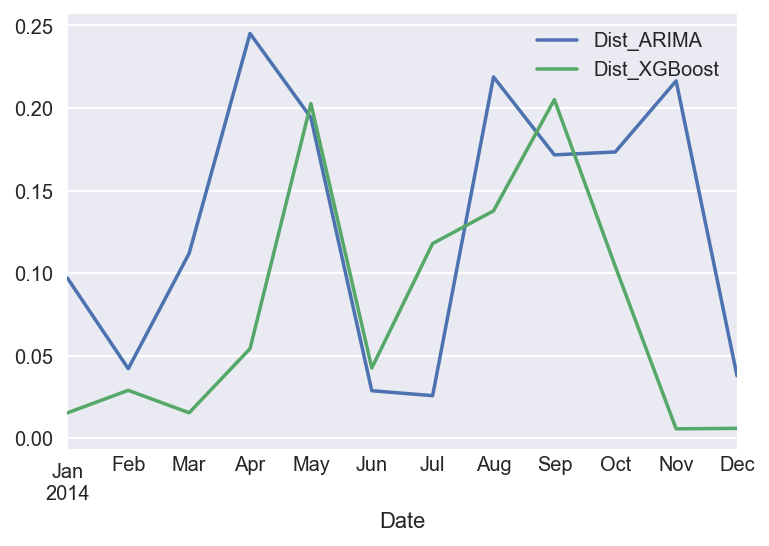

In [5]:
data_evaluation[['Dist_ARIMA','Dist_XGBoost']].plot()

In [6]:
np.mean(data_evaluation['Dist_ARIMA'])

0.13020384563589063

In [7]:
np.mean(data_evaluation['Dist_XGBoost'])

0.077902888207687468

In [8]:
sum(data_evaluation['Better']>0)

8

In [9]:
sum(data_evaluation['Better'])

0.62761148913843812

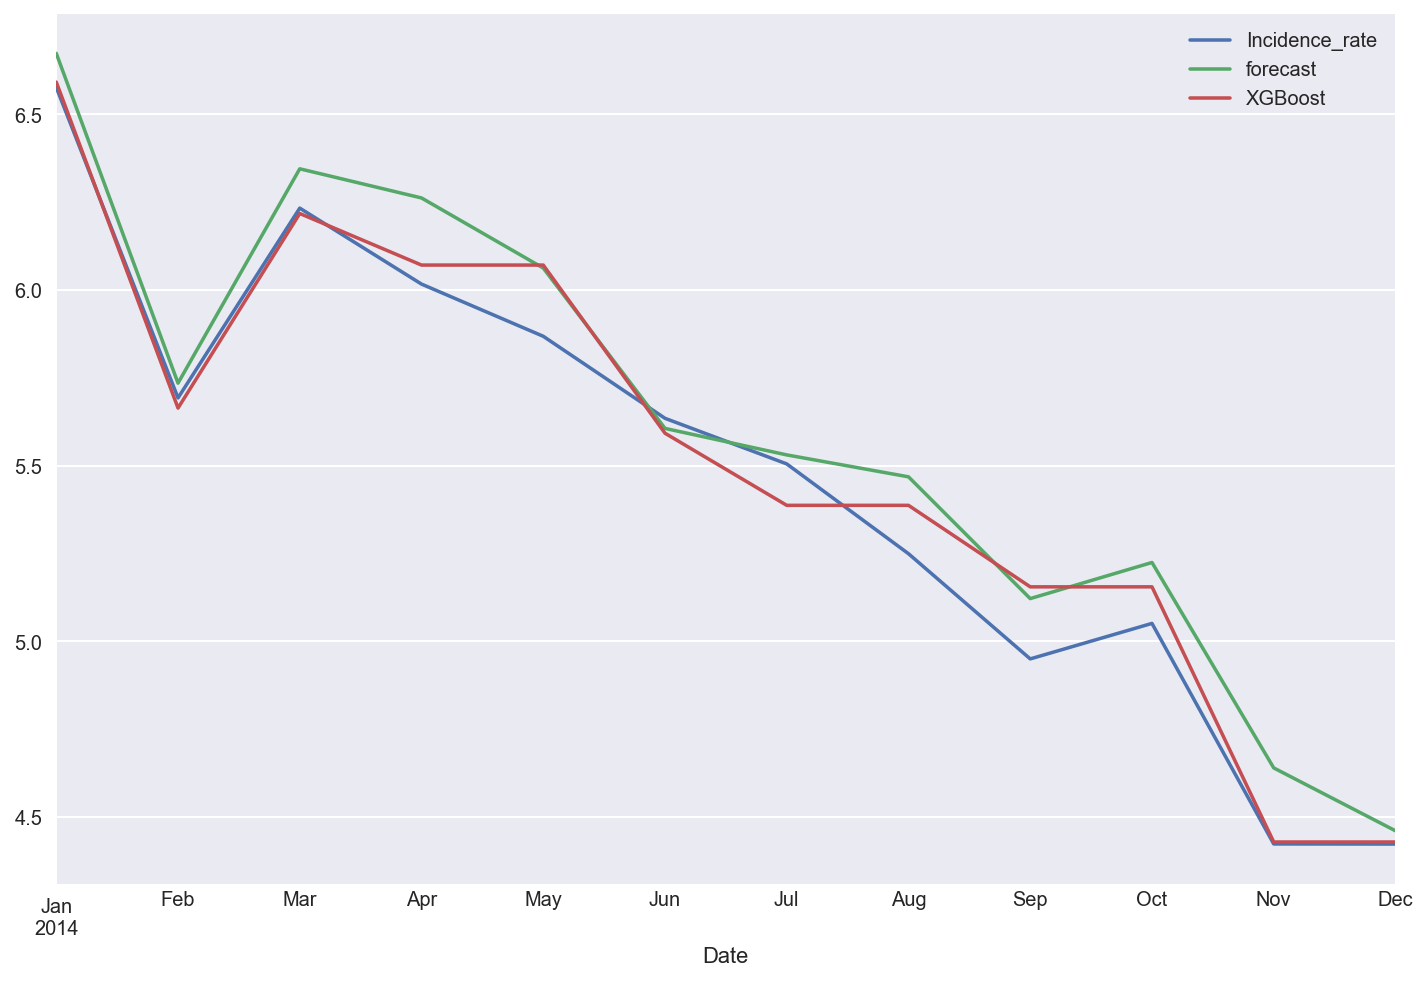

In [10]:
data_evaluation[['Incidence_rate','forecast','XGBoost']].plot(figsize=(12, 8)) 

### 内部验证

In [11]:
data_intro =pd.read_excel('data_GRNN.xlsx',index_col='Date')[:-12]

In [12]:
## 绝对误差
data_intro['Dist_ARIMA'] =abs(data_intro['forecast']-data_intro['Incidence_rate'])
data_intro['Dist_GRNN'] = abs(data_intro['NN']-data_intro['Incidence_rate'])
data_intro['Better'] = data_intro['Dist_ARIMA']  - data_intro['Dist_GRNN'] 

## 相对误差
data_intro['ARIMA_per']  = (data_intro['Dist_ARIMA']/data_intro['Incidence_rate'])*100
data_intro['GRNN_per'] = (data_intro['Dist_GRNN']/data_intro['Incidence_rate'])*100

In [13]:
np.mean(data_intro['Dist_ARIMA'])

0.33805778418808308

In [14]:
np.mean(data_intro['Dist_GRNN'])

0.19426236290533566

In [15]:
np.mean(data_intro['Better']>0)

0.66315789473684206

In [16]:
sum(data_intro['Better'])

13.660565021861002

In [17]:
np.mean(data_intro['Better'])/data_intro['Incidence_rate'].mean()*100

2.2108558449049052

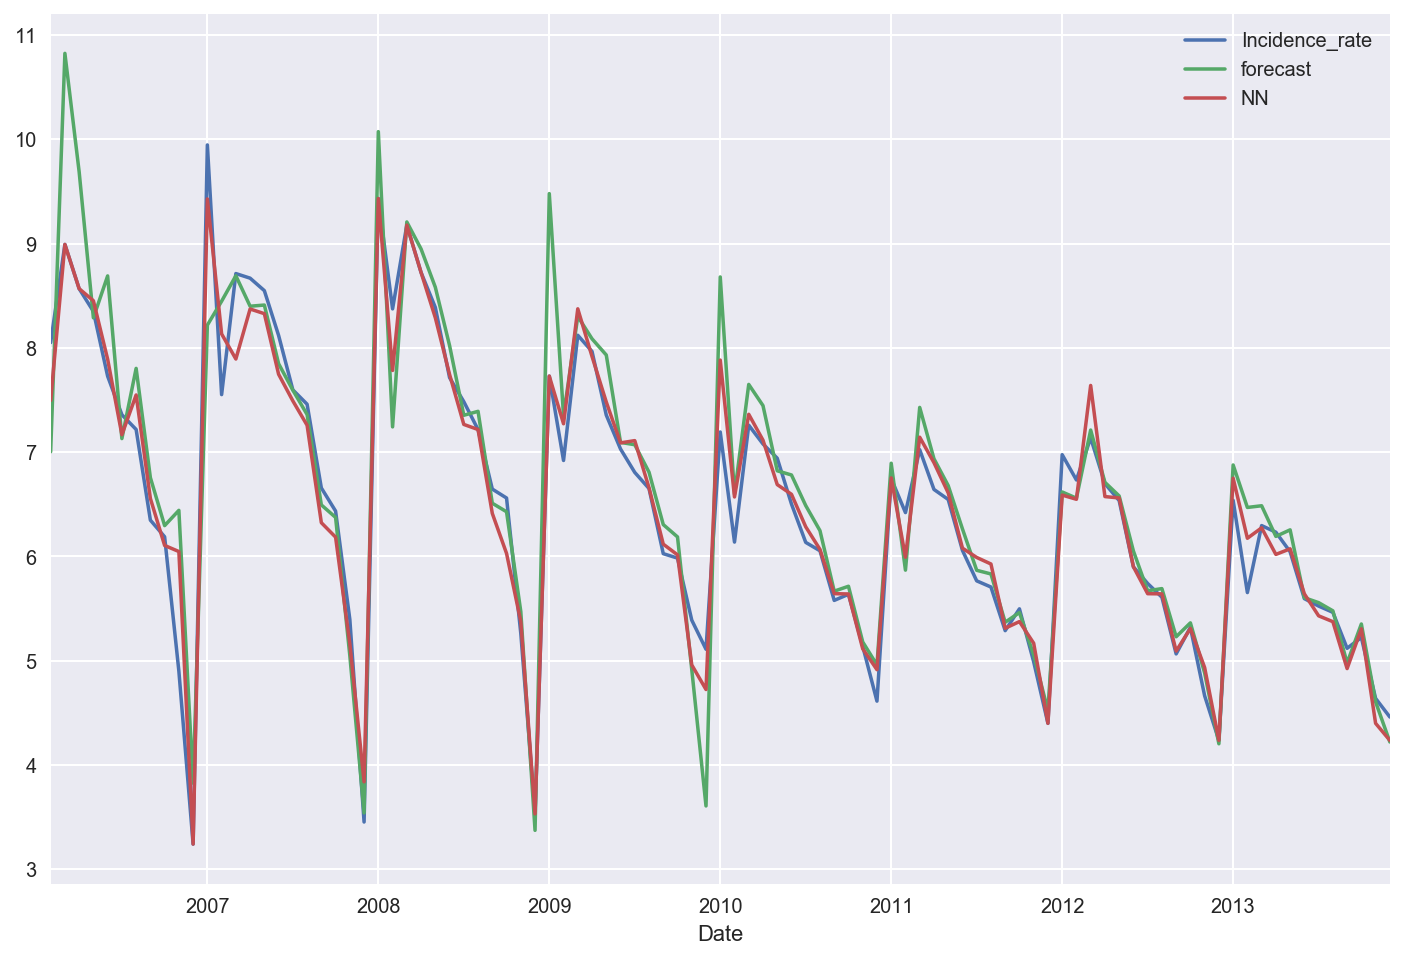

In [18]:
data_intro[['Incidence_rate','forecast','NN']].plot(figsize=(12, 8)) 

### 数据集验证

In [ ]:
data_total =pd.read_excel('data_GRNN.xlsx',index_col='Date')

In [ ]:
## 绝对误差
data_total['Dist_ARIMA'] = abs(data_total['forecast']-data_total['Incidence_rate'])
data_total['Dist_GRNN'] = abs(data_total['NN']-data_total['Incidence_rate'])
data_total['Better'] = data_total['Dist_ARIMA']  - data_total['Dist_GRNN'] 
data_total['error_ARIMA'] = data_total['forecast']-data_total['Incidence_rate']
data_total['error_GRNN'] = data_total['NN']-data_total['Incidence_rate']

## 相对误差
data_total['ARIMA_per']  = (data_total['Dist_ARIMA']/data_total['Incidence_rate'])*100
data_total['GRNN_per'] = (data_total['Dist_GRNN']/data_total['Incidence_rate'])*100

In [ ]:
np.mean(data_total['Dist_ARIMA'])

In [ ]:
np.mean(data_total['Dist_GRNN'])

In [ ]:
np.mean(data_total['Better']>0)

In [ ]:
sum(data_total['Better'])

In [ ]:
np.mean(data_total['Better'])/data_total['Incidence_rate'].mean()*100

In [ ]:
data_total[['Incidence_rate','forecast','NN']].plot(figsize=(12, 8)) 

### 残差检验

In [ ]:
data_total[['Dist_ARIMA','Dist_GRNN']]

In [ ]:
data_total[['Dist_ARIMA','Dist_GRNN']].plot(figsize=(12, 8)) 